In [3]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 325.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.2 kB 744.7 kB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.1 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


In [11]:
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']

# Preview
df.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [13]:
# Remove missing values
df.dropna(inplace=True)

# Cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text.strip()

# Apply
df['Cleaned_Tweet'] = df['Tweet'].apply(clean_text)
df.head()


,ID,Entity,Sentiment,Tweet,Cleaned_Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


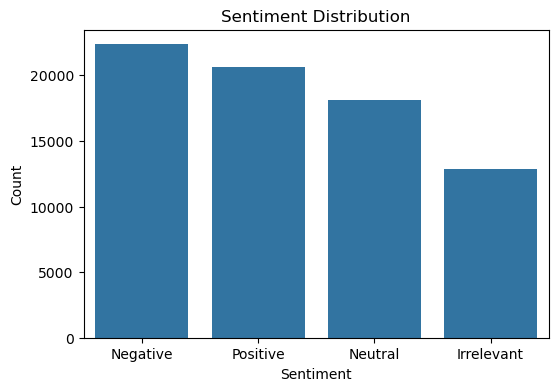

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, order=df['Sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


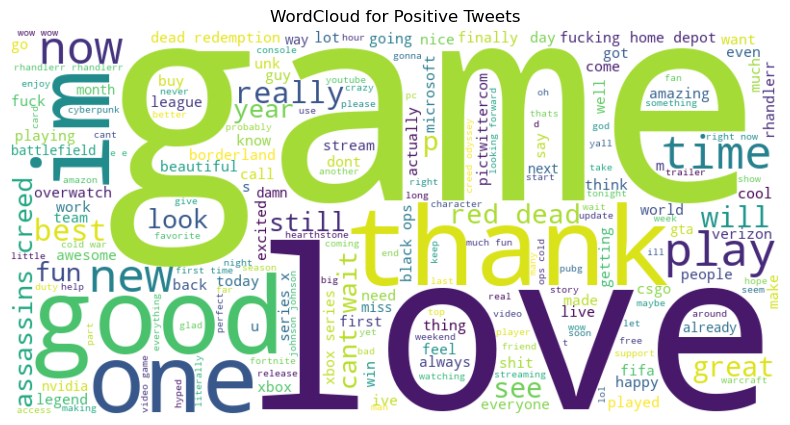

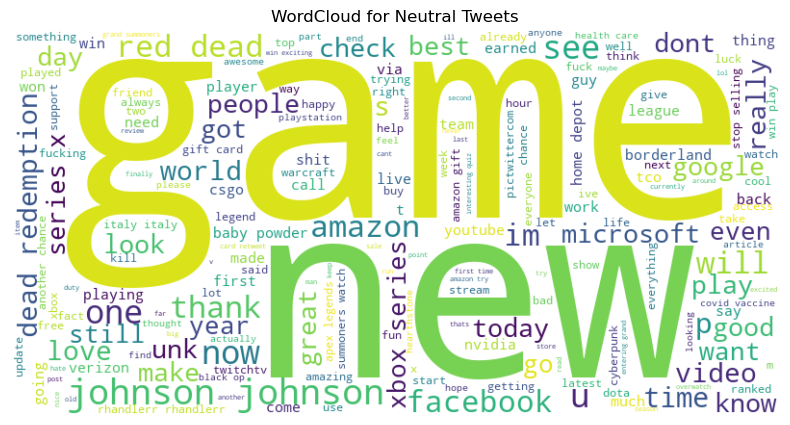

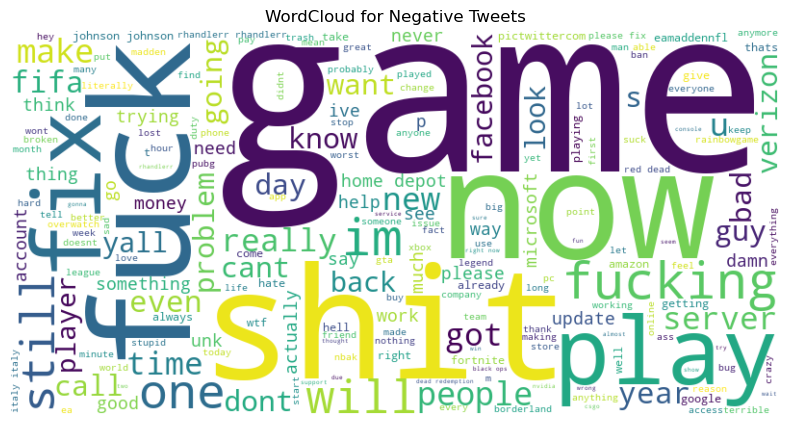

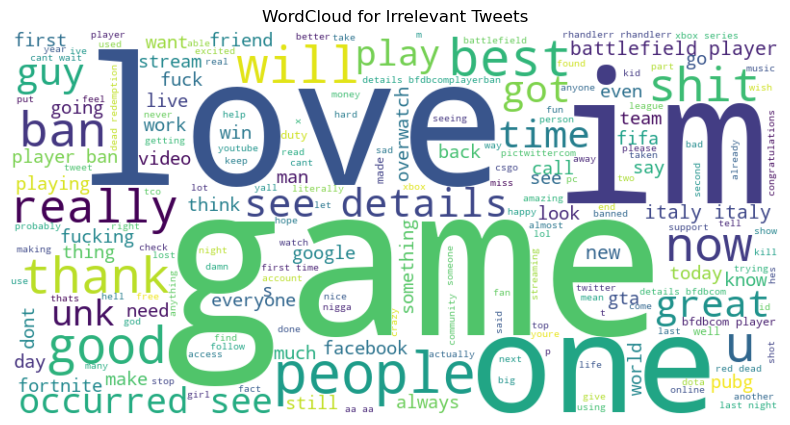

In [17]:
def plot_wordcloud(sentiment):
    text = ' '.join(df[df['Sentiment'] == sentiment]['Cleaned_Tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment} Tweets')
    plt.show()

for sentiment in df['Sentiment'].unique():
    plot_wordcloud(sentiment)


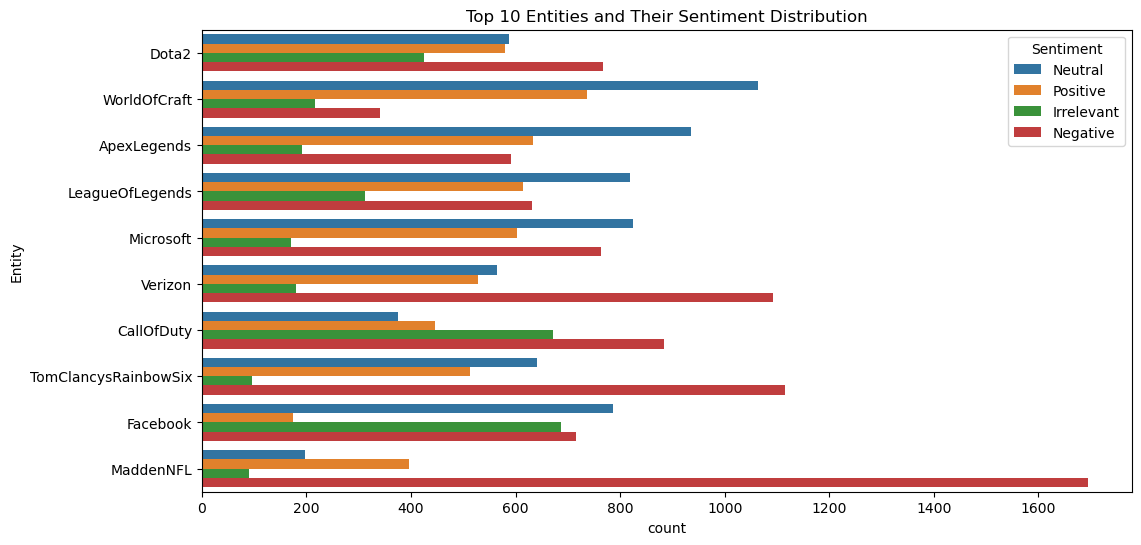

In [19]:
plt.figure(figsize=(12, 6))
top_entities = df['Entity'].value_counts().index[:10]
sns.countplot(data=df[df['Entity'].isin(top_entities)], y='Entity', hue='Sentiment')
plt.title("Top 10 Entities and Their Sentiment Distribution")
plt.show()


In [21]:
X = df['Cleaned_Tweet']
y = df['Sentiment']

vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Irrelevant       0.81      0.55      0.66      2696
    Negative       0.69      0.85      0.76      4380
     Neutral       0.80      0.60      0.69      3605
    Positive       0.69      0.81      0.74      4119

    accuracy                           0.72     14800
   macro avg       0.75      0.70      0.71     14800
weighted avg       0.74      0.72      0.72     14800



In [ ]:
## Conclusion

- The dataset was preprocessed and cleaned.
- Distribution of sentiments shows that [insert observation].
- WordClouds gave insight into commonly used words for each sentiment.
- A basic sentiment classifier achieved [insert accuracy] using Naive Bayes.

This project helped in understanding social media sentiment trends effectively.
